In [1]:
%matplotlib inline
import numpy as np
import sqlite3
import pandas as pd 
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt 
from itertools import cycle, islice
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
diabetes1 = pd.read_csv('../FinalProyect/diabetes_data_upload.csv', sep=',')
diabetes1.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [3]:
diabetes1.shape

(520, 17)

In [4]:
diabetes1.columns = [c.replace(' ', '_') for c in diabetes1.columns]

In [5]:
diabetes2 = pd.read_csv('../FinalProyect/pima-indians-diabetes.csv', sep=',')
diabetes2.head()

,1. Number of times pregnant,2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test,3. Diastolic blood pressure (mm Hg),4. Triceps skin fold thickness (mm),5. 2-Hour serum insulin (mu U/ml),6. Body mass index (weight in kg/(height in m)^2),7. Diabetes pedigree function,8. Age (years),9. Class variable (0 or 1)
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
diabetes2.shape

(768, 9)

In [7]:
diabetes1.isnull().any()

Age                   False
Gender                False
Polyuria              False
Polydipsia            False
sudden_weight_loss    False
weakness              False
Polyphagia            False
Genital_thrush        False
visual_blurring       False
Itching               False
Irritability          False
delayed_healing       False
partial_paresis       False
muscle_stiffness      False
Alopecia              False
Obesity               False
class                 False
dtype: bool

In [8]:
diabetes2.isnull().any()

1. Number of times pregnant                                                    False
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test    False
3. Diastolic blood pressure (mm Hg)                                            False
4. Triceps skin fold thickness (mm)                                            False
5. 2-Hour serum insulin (mu U/ml)                                              False
6. Body mass index (weight in kg/(height in m)^2)                              False
7. Diabetes pedigree function                                                  False
8. Age (years)                                                                 False
9. Class variable (0 or 1)                                                     False
dtype: bool

# Classification First Dataset

In [9]:
y=diabetes1[['class']].copy()

In [10]:
X = diabetes1.copy()

In [11]:
X.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden_weight_loss',
       'weakness', 'Polyphagia', 'Genital_thrush', 'visual_blurring',
       'Itching', 'Irritability', 'delayed_healing', 'partial_paresis',
       'muscle_stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [12]:
enc2 = LabelEncoder()

for col in X.columns:
    if col!='Age' or col!='class':
        X[col] = enc2.fit_transform(X[col])
    
X.head()

,Age,Gender,Polyuria,Polydipsia,sudden_weight_loss,weakness,Polyphagia,Genital_thrush,visual_blurring,Itching,Irritability,delayed_healing,partial_paresis,muscle_stiffness,Alopecia,Obesity,class
0,16,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,34,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,17,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,21,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,36,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [13]:
X.corr()

,Age,Gender,Polyuria,Polydipsia,sudden_weight_loss,weakness,Polyphagia,Genital_thrush,visual_blurring,Itching,Irritability,delayed_healing,partial_paresis,muscle_stiffness,Alopecia,Obesity,class
Age,1.000000,0.067835,0.209066,0.130718,0.056937,0.233688,0.325301,0.080612,0.405024,0.293839,0.210919,0.265017,0.236820,0.304223,0.326015,0.149931,0.106419
Gender,0.067835,1.000000,-0.268894,-0.312262,-0.281840,-0.124490,-0.219968,0.208961,-0.208092,-0.052496,-0.013735,-0.101978,-0.332288,-0.090542,0.327871,-0.005396,-0.449233
Polyuria,0.209066,-0.268894,1.000000,0.598609,0.447207,0.263000,0.373873,0.087273,0.235095,0.088289,0.237740,0.149873,0.441664,0.152938,-0.144192,0.126567,0.665922
Polydipsia,0.130718,-0.312262,0.598609,1.000000,0.405965,0.332453,0.316839,0.028081,0.331250,0.128716,0.203446,0.115691,0.442249,0.180723,-0.310964,0.098691,0.648734
sudden_weight_loss,0.056937,-0.281840,0.447207,0.405965,1.000000,0.282884,0.243511,0.089858,0.068754,-0.004516,0.140340,0.088140,0.264014,0.109756,-0.202727,0.169294,0.436568
weakness,0.233688,-0.124490,0.263000,0.332453,0.282884,1.000000,0.180266,0.027780,0.301043,0.309440,0.146698,0.335507,0.272982,0.263164,0.090490,0.045665,0.243275
Polyphagia,0.325301,-0.219968,0.373873,0.316839,0.243511,0.180266,1.000000,-0.063712,0.293545,0.144390,0.239466,0.263980,0.373569,0.320031,-0.053498,0.029785,0.342504
Genital_thrush,0.080612,0.208961,0.087273,0.028081,0.089858,0.027780,-0.063712,1.000000,-0.148408,0.125336,0.160551,0.136111,-0.195612,-0.100188,0.204847,0.053828,0.110288
visual_blurring,0.405024,-0.208092,0.235095,0.331250,0.068754,0.301043,0.293545,-0.148408,1.000000,0.291191,0.077095,0.177767,0.364156,0.412369,0.014604,0.109005,0.251300
Itching,0.293839,-0.052496,0.088289,0.128716,-0.004516,0.309440,0.144390,0.125336,0.291191,1.000000,0.114006,0.453316,0.116669,0.215575,0.266506,0.001894,-0.013384


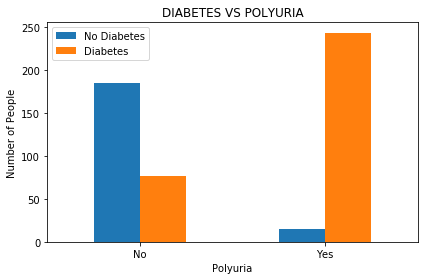

In [14]:
fig, ax = plt.subplots(1, 1)
X.groupby('class').Polyuria.value_counts().unstack(0).plot.bar(rot=0, ax=ax)

ax.set_xlabel('Polyuria')
ax.set_title('DIABETES VS POLYURIA')
ax.set_ylabel('Number of People')
ax.set_xticklabels(diabetes1['Polyuria'].value_counts().index.values)

ax.legend(["No Diabetes", "Diabetes"]);
fig.tight_layout()
plt.savefig('diabetes1.png', dpi=300, bbox_inches='tight')
plt.show()


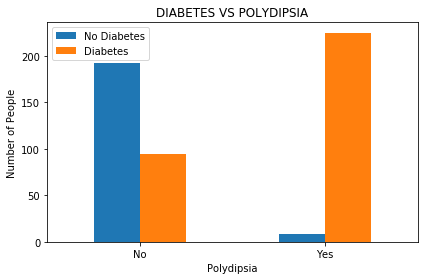

In [15]:
fig, ax = plt.subplots(1, 1)
X.groupby('class').Polydipsia.value_counts().unstack(0).plot.bar(rot=0, ax=ax)

ax.set_xlabel('Polydipsia')
ax.set_title('DIABETES VS POLYDIPSIA')
ax.set_ylabel('Number of People')
ax.set_xticklabels(diabetes1['Polydipsia'].value_counts().index.values)

ax.legend(["No Diabetes", "Diabetes"]);
fig.tight_layout()
plt.savefig('diabetes2.png', dpi=300, bbox_inches='tight')
plt.show()


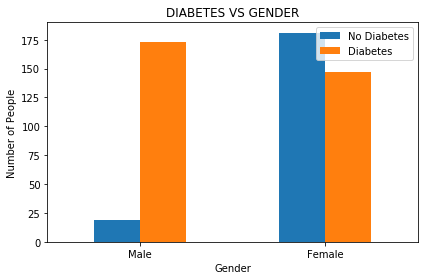

In [16]:
fig, ax = plt.subplots(1, 1)
X.groupby('class').Gender.value_counts().unstack(0).plot.bar(rot=0, ax=ax)
ax.set_xlabel('Gender')
ax.set_title('DIABETES VS GENDER')
ax.set_ylabel('Number of People')
ax.set_xticklabels(diabetes1['Gender'].value_counts().index.values)

ax.legend(["No Diabetes", "Diabetes"]);
fig.tight_layout()
plt.savefig('diabetes3.png', dpi=300, bbox_inches='tight')
plt.show()

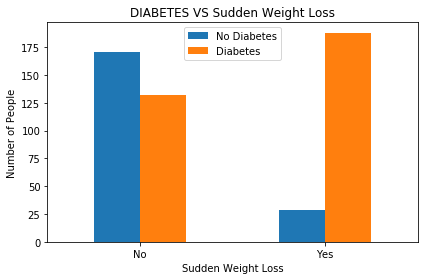

In [17]:
fig, ax = plt.subplots(1, 1)
X.groupby('class').sudden_weight_loss.value_counts().unstack(0).plot.bar(rot=0, ax=ax)
ax.set_xlabel('Sudden Weight Loss')
ax.set_title('DIABETES VS Sudden Weight Loss')
ax.set_ylabel('Number of People')
ax.set_xticklabels(diabetes1['sudden_weight_loss'].value_counts().index.values)

ax.legend(["No Diabetes", "Diabetes"]);
fig.tight_layout()
plt.savefig('diabetes4.png', dpi=300, bbox_inches='tight')
plt.show()

In [18]:
del(X['class'])

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [20]:
diabetes_classifier = DecisionTreeClassifier(max_leaf_nodes=5)
diabetes_classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=5,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [21]:
predictions = diabetes_classifier.predict(X_test)

In [22]:
accuracy_score(y_true = y_test, y_pred = predictions)

0.9186046511627907

In [23]:
second_clasifier = svm.SVC(gamma='auto')
second_clasifier=second_clasifier.fit(X_train, y_train.values.ravel())

In [24]:
y_pred = second_clasifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.9418604651162791

# Classification Second Dataset

In [25]:
diabetes2.dtypes

1. Number of times pregnant                                                      int64
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test      int64
3. Diastolic blood pressure (mm Hg)                                              int64
4. Triceps skin fold thickness (mm)                                              int64
5. 2-Hour serum insulin (mu U/ml)                                                int64
6. Body mass index (weight in kg/(height in m)^2)                              float64
7. Diabetes pedigree function                                                  float64
8. Age (years)                                                                   int64
9. Class variable (0 or 1)                                                       int64
dtype: object

In [26]:
X2=diabetes2.copy()

In [27]:
X2.columns

Index(['1. Number of times pregnant',
       '2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test',
       '3. Diastolic blood pressure (mm Hg)',
       '4. Triceps skin fold thickness (mm)',
       '5. 2-Hour serum insulin (mu U/ml)',
       '6. Body mass index (weight in kg/(height in m)^2)',
       '7. Diabetes pedigree function', '8. Age (years)',
       '9. Class variable (0 or 1)'],
      dtype='object')

In [28]:
X2.corr()

,1. Number of times pregnant,2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test,3. Diastolic blood pressure (mm Hg),4. Triceps skin fold thickness (mm),5. 2-Hour serum insulin (mu U/ml),6. Body mass index (weight in kg/(height in m)^2),7. Diabetes pedigree function,8. Age (years),9. Class variable (0 or 1)
1. Number of times pregnant,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
3. Diastolic blood pressure (mm Hg),0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
4. Triceps skin fold thickness (mm),-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
5. 2-Hour serum insulin (mu U/ml),-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
6. Body mass index (weight in kg/(height in m)^2),0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
7. Diabetes pedigree function,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
8. Age (years),0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
9. Class variable (0 or 1),0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


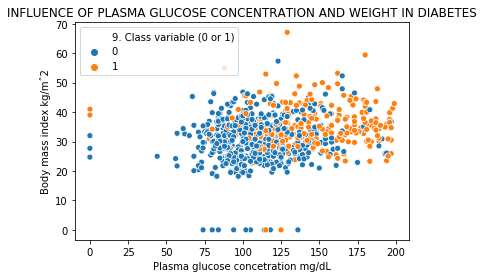

In [29]:
import seaborn as sns
fig, ax = plt.subplots(1, 1)
fig=sns.scatterplot(x="2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test",y="6. Body mass index (weight in kg/(height in m)^2)", data=X2, hue="9. Class variable (0 or 1)")
ax.set_xlabel('Plasma glucose concetration mg/dL')
ax.set_title('INFLUENCE OF PLASMA GLUCOSE CONCENTRATION AND WEIGHT IN DIABETES')
ax.set_ylabel('Body mass index kg/mˆ2')
plt.savefig('diabetes5.png', dpi=300, bbox_inches='tight')
plt.show()

In [30]:
del(X2['9. Class variable (0 or 1)'])
X3 = StandardScaler().fit_transform(X2)

kmeans = KMeans(n_clusters=5)
model = kmeans.fit(X3)
centers = model.cluster_centers_
centers

array([[-0.52025091,  0.66054092,  0.18945765,  0.89051647,  1.17323095,
         0.69064165,  0.39921683, -0.36031892],
       [-0.54892868, -0.62690015, -0.09495642, -0.0428255 , -0.26663126,
        -0.35805817, -0.1665342 , -0.66733697],
       [ 1.23848432,  0.31020699,  0.46583862,  0.74096762,  0.13003257,
         0.24287564,  0.20688883,  1.0190253 ],
       [ 0.59781013,  0.28603251,  0.43712216, -1.24667606, -0.69289057,
        -0.05943042, -0.22597207,  0.88729794],
       [-0.08597076, -0.12188771, -3.53813207, -1.16275609, -0.68686078,
        -0.79054054, -0.23771244, -0.23794288]])

In [31]:
def pd_centers(featuresUsed, centers):
	colNames = list(featuresUsed)
	colNames.append('prediction')

	# Zip with a column called 'prediction' (index)
	Z = [np.append(A, index) for index, A in enumerate(centers)]

	# Convert to pandas data frame for plotting
	P = pd.DataFrame(Z, columns=colNames)
	P['prediction'] = P['prediction'].astype(int)
	return P

In [32]:
P = pd_centers(X2.columns, centers)
P

,1. Number of times pregnant,2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test,3. Diastolic blood pressure (mm Hg),4. Triceps skin fold thickness (mm),5. 2-Hour serum insulin (mu U/ml),6. Body mass index (weight in kg/(height in m)^2),7. Diabetes pedigree function,8. Age (years),prediction
0,-0.520251,0.660541,0.189458,0.890516,1.173231,0.690642,0.399217,-0.360319,0
1,-0.548929,-0.626900,-0.094956,-0.042826,-0.266631,-0.358058,-0.166534,-0.667337,1
2,1.238484,0.310207,0.465839,0.740968,0.130033,0.242876,0.206889,1.019025,2
3,0.597810,0.286033,0.437122,-1.246676,-0.692891,-0.059430,-0.225972,0.887298,3
4,-0.085971,-0.121888,-3.538132,-1.162756,-0.686861,-0.790541,-0.237712,-0.237943,4


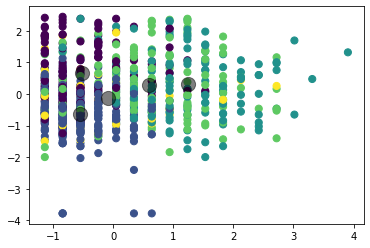

In [33]:
y_kmeans = kmeans.predict(X3)

plt.scatter(X3[:, 0], X3[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.savefig('diabetes6.png', dpi=300, bbox_inches='tight')

In [34]:
def parallel_plot(data):
	my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(data)))
	plt.figure(figsize=(15,8)).gca().axes.set_ylim([-3,+3])
	parallel_coordinates(data, 'prediction', color = my_colors, marker='o')

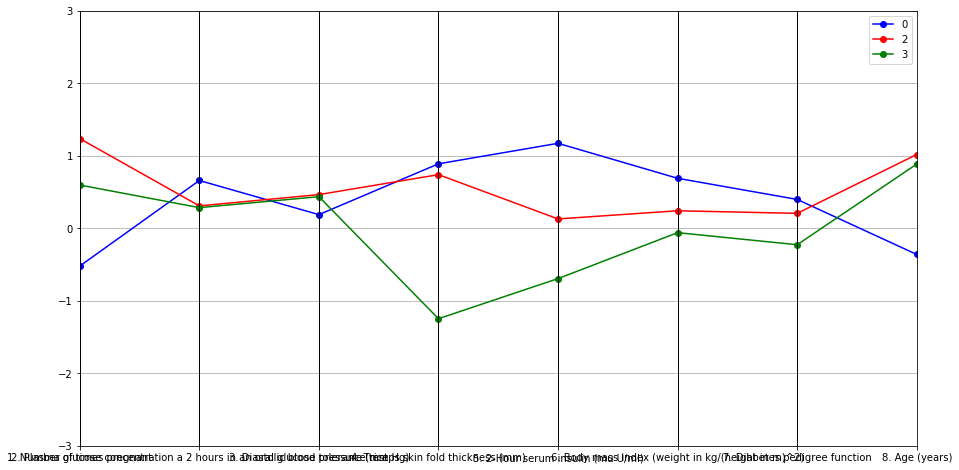

In [35]:
parallel_plot(P[P['2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test'] > 0])